In [1]:
import numpy as np
import networkx as nx
# import tensorflow as tf
import math

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# from tensorflow.keras import Sequential, Model
# from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Embedding
from matplotlib.lines import Line2D
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
# matplotlib.rcParams['text.usetex'] = True

In [2]:
   ### LP   ## Train on 50% of data
    
unweighted = np.array([ 84.94545454545454 ,  90.60710559253558 ,  64.98150464780161 ,  25.62560094473395 ,  171.00651306167782])

# rw_method = np.array([84.15 ,  88.38599837990597 ,  69.28649427779794 ,  19.09950410210805 ,  98.94556504456605])
# #p = '2.0'
# #alpha = ['0.4']

# rw_method = np.array([84.56363636363636 ,  88.64707864443534 ,  70.00094544678964 ,  18.646133197645682 ,  94.85673613803138])
# #p = '1.0'
# #alpha = ['0.4']

# rw_method = np.array([79.0340909090909 ,  82.11187020073913 ,  68.16890654876916 ,  13.989249181685736 ,  56.84682015655275])
# #p = '2.0'
# #alpha = ['0.5']

rw_method = np.array([80.72045454545454 ,  83.83826481210454 ,  69.69940873494328 ,  14.242511768072987 ,  58.688016869050834
])
#p = '1.0'
#alpha = ['0.5']



fairwalk = np.array([81.94318181818181 ,  85.45294863043317 ,  69.47465794795053 ,  15.97829068248263 ,  71.37278126897178])

uw = np.array([0.0923, unweighted[0], unweighted[4]])
alpha0_3_p_1 = np.array([0.0599, 86.77, 183.85])
alpha0_5_p_1 = np.array([0.016, rw_method[0], rw_method[4]])
alpha0_7_p_1 = np.array([0.0094, 68.09, 14.17])
rnd = np.array([0.011, 11.16, 5.97])

In [3]:
n_seeds = np.arange(2,41,2)


red_ = '#fab3ac'
blue_ = '#29a5e3'
cyan_ = '#d2f0f7'
green_ = '#a3f77e'
gray_ = '#dbdbdb'
purple_ = '#BF55EC'
yellow_ = '#F7CA18'

In [4]:
def get_bar_plot(real, bar_width, fontsize, labelsize, imagesize, ylim, legend_size):
    
    #labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
    #labels = ['A-A', 'B-B', 'A-B', 'Total']
    
    xu = [2 - bar_width, 2]
    xf = [5.5 - bar_width, 5.5]
    xp = [9 - bar_width, 9]
    
    
    print(unweighted[4])
    print(fairwalk[4])
    print(rw_method[4])
    
    fig, ax = plt.subplots()
    
    ax.bar(xu[0], unweighted[0], bar_width, color = purple_, edgecolor='black', label='Total Accuracy')
    ax.bar(xf[0], fairwalk[0], bar_width, color = purple_, edgecolor='black')
    ax.bar(xp[0], rw_method[0], bar_width, color = purple_, edgecolor='black')
    
#     ax.bar(xu[1], acc_unweighted['max_diff'], bar_width, color = green_, hatch='//', edgecolor='black')
#     ax.bar(xp[1], acc_proposed['max_diff'], bar_width, color = blue_, hatch='//', edgecolor='black')
    ax.bar(xu[1], unweighted[4], bar_width, color = yellow_, edgecolor='black', label='Disparity')
    ax.bar(xf[1], fairwalk[4], bar_width, color = yellow_, edgecolor='black')
    ax.bar(xp[1], rw_method[4], bar_width, color = yellow_, edgecolor='black')


#     ax.bar(xu[0], 0, bar_width, color = gray_, label='Total Accuracy', edgecolor='black')
#     ax.bar(xu[1], 0, bar_width, color = gray_, hatch='//', label='Discrepancy', edgecolor='black')

    plt.legend(loc='upper right', prop={'size': legend_size}) #'upper left')
    
    #custom_lines = [Line2D([0], [0], color=green_, lw=3),
    #                Line2D([0], [0], color=blue_, lw=3)]
#                     Line2D([0], [0], color='blue', lw=3), 
#                     Line2D([0], [0], color='cyan', lw=3)]
    #legend1 = plt.legend(custom_lines, ['DeepWalk', 'FairWalk'], bbox_to_anchor=(-0.24, 1.06, 1.4, .102), loc='upper right',
#                ncol=2, mode="expand", borderaxespad=0.)
#     plt.gca().add_artist(legend1)
    
#     custom_lines2 = [Line2D([0], [0], linestyle='dashed', lw=3),
#                     Line2D([0], [0], linestyle='dotted', lw=3)]
#     legend2 = plt.legend(custom_lines2, ['Group A', 'Group B'])
#     plt.gca().add_artist(legend2)
    
    ax.set_ylim(ylim)
     
    
    
#     ax.set_xticklabels(labels)
#     plt.xticks([0.6,1,1.4,2.6,3,3.4,4.6,5,5.4,6.6,7,7.4], ['Total','Group A','Group B','Total','Group A','Group B','Total','Group A','Group B','Total','Group A','Group B'], rotation=60, horizontalalignment='right', fontsize=12)
    plt.xticks([2, 5.5, 9], ['DeepWalk', 'FairWalk', 'CrossWalk'], fontsize = legend_size)
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed')
    
#     plt.xlabel('Methods', fontsize = labelsize)
#     plt.ylabel('Accuracy', fontsize = labelsize)
    plt.rcParams.update({'font.size': fontsize})
    plt.yticks(fontsize=labelsize)
    fig.set_size_inches(imagesize[0], imagesize[1]) 
        
    fig.savefig('fig/classification_rice/classification_rice_LP_bar.pdf',bbox_inches='tight')
    

In [5]:
def get_mmd_plot(real, bar_width, fontsize, labelsize, imagesize, ylim, legend_size):
    
    #labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
    #labels = ['A-A', 'B-B', 'A-B', 'Total']
    
    xu = [2 - bar_width, 2, 2 + bar_width]
    x0_3 = [6 - bar_width, 6, 6 + bar_width]
    x0_5 = [10 - bar_width, 10, 10 + bar_width]
    x0_7 = [14 - bar_width, 14, 14 + bar_width]
    xr = [18 - bar_width, 18, 18 + bar_width]
    
    
    fig, ax = plt.subplots()
    
    ax.bar(xu[0], 1000 * uw[0], bar_width, color = green_, edgecolor='black', label='MMD ✕ 1000')
    ax.bar(x0_3[0], 1000 * alpha0_3_p_1[0], bar_width, color = green_, edgecolor='black')
    ax.bar(x0_5[0], 1000 * alpha0_5_p_1[0], bar_width, color = green_, edgecolor='black')
    ax.bar(x0_7[0], 1000 * alpha0_7_p_1[0], bar_width, color = green_, edgecolor='black')
    ax.bar(xr[0], 1000 * rnd[0], bar_width, color = green_, edgecolor='black')

    
    ax.bar(xu[1], uw[1], bar_width, color = purple_, edgecolor='black', label='Total Accuracy')
    ax.bar(x0_3[1], alpha0_3_p_1[1], bar_width, color = purple_, edgecolor='black')
    ax.bar(x0_5[1], alpha0_5_p_1[1], bar_width, color = purple_, edgecolor='black')
    ax.bar(x0_7[1], alpha0_7_p_1[1], bar_width, color = purple_, edgecolor='black')
    ax.bar(xr[1], rnd[1], bar_width, color = purple_, edgecolor='black')

    ax.bar(xu[2], uw[2], bar_width, color = yellow_, edgecolor='black', label='Disparity')
    ax.bar(x0_3[2], alpha0_3_p_1[2], bar_width, color = yellow_, edgecolor='black')
    ax.bar(x0_5[2], alpha0_5_p_1[2], bar_width, color = yellow_, edgecolor='black')
    ax.bar(x0_7[2], alpha0_7_p_1[2], bar_width, color = yellow_, edgecolor='black')
    ax.bar(xr[2], rnd[2], bar_width, color = yellow_, edgecolor='black')

    
#     ax.bar(xu[1], acc_unweighted['max_diff'], bar_width, color = green_, hatch='//', edgecolor='black')
#     ax.bar(xp[1], acc_proposed['max_diff'], bar_width, color = blue_, hatch='//', edgecolor='black')



#     ax.bar(xu[0], 0, bar_width, color = gray_, label='Total Accuracy', edgecolor='black')
#     ax.bar(xu[1], 0, bar_width, color = gray_, hatch='//', label='Discrepancy', edgecolor='black')

    plt.legend(loc='upper right', prop={'size': legend_size}) #'upper left')
    
    #custom_lines = [Line2D([0], [0], color=green_, lw=3),
    #                Line2D([0], [0], color=blue_, lw=3)]
#                     Line2D([0], [0], color='blue', lw=3), 
#                     Line2D([0], [0], color='cyan', lw=3)]
    #legend1 = plt.legend(custom_lines, ['DeepWalk', 'FairWalk'], bbox_to_anchor=(-0.24, 1.06, 1.4, .102), loc='upper right',
#                ncol=2, mode="expand", borderaxespad=0.)
#     plt.gca().add_artist(legend1)
    
#     custom_lines2 = [Line2D([0], [0], linestyle='dashed', lw=3),
#                     Line2D([0], [0], linestyle='dotted', lw=3)]
#     legend2 = plt.legend(custom_lines2, ['Group A', 'Group B'])
#     plt.gca().add_artist(legend2)
    
    ax.set_ylim(ylim)
     
    
    
#     ax.set_xticklabels(labels)
#     plt.xticks([0.6,1,1.4,2.6,3,3.4,4.6,5,5.4,6.6,7,7.4], ['Total','Group A','Group B','Total','Group A','Group B','Total','Group A','Group B','Total','Group A','Group B'], rotation=60, horizontalalignment='right', fontsize=12)
    plt.xticks([2, 6, 10, 14, 18], ['DeepWalk', 'CrossWalk\nα=0.3, p=1', 'CrossWalk\nα=0.5, p=1', 'CrossWalk\nα=0.7, p=1', 'Random\nEmbedding'], fontsize = 18)
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed')
    
#     plt.xlabel('Methods', fontsize = labelsize)
#     plt.ylabel('Accuracy', fontsize = labelsize)
    plt.rcParams.update({'font.size': fontsize})
    plt.yticks(fontsize=labelsize)
    fig.set_size_inches(imagesize[0], imagesize[1]) 
        
    fig.savefig('fig/classification_rice/classification_rice_LP_mmd.pdf',bbox_inches='tight')
    

In [6]:
def get_legend():
    params = {'legend.fontsize': 12,
          'legend.handlelength': 2}
    plt.rcParams.update(params)
    fig, ax = plt.subplots(figsize=(6.1,.015))
    custom_lines = [Line2D([0], [0], color=red_, lw=3),
            Line2D([0], [0], color=blue_, lw=3)]
    legend1 = plt.legend(custom_lines, ['Deepwalk + Semi-supervised Label Propagation', 'Reweighting + Deepwalk + Semi-supervised Label Propagation'], bbox_to_anchor=(-0.24, 1.06, 1.4, .102), loc='lower left',
          ncol=1, mode="expand", borderaxespad=0.)
#     legend1 = plt.legend(custom_lines, ['Deepwalk + K-Nearest Neighbors', 'Reweighting + Deepwalk + K-Nearest Neighbors'], bbox_to_anchor=(-0.24, 1.06, 1.4, .102), loc='lower left',
#            ncol=1, mode="expand", borderaxespad=0.)
    plt.gca().add_artist(legend1)
    plt.axis('off')
    fig.savefig('fig/classification_rice/legend.pdf', bbox_inches='tight')

171.00651306167782
71.37278126897178
58.688016869050834


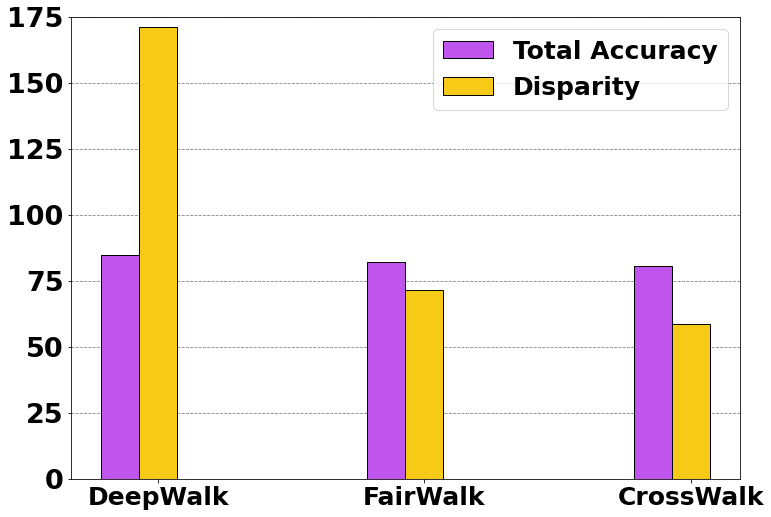

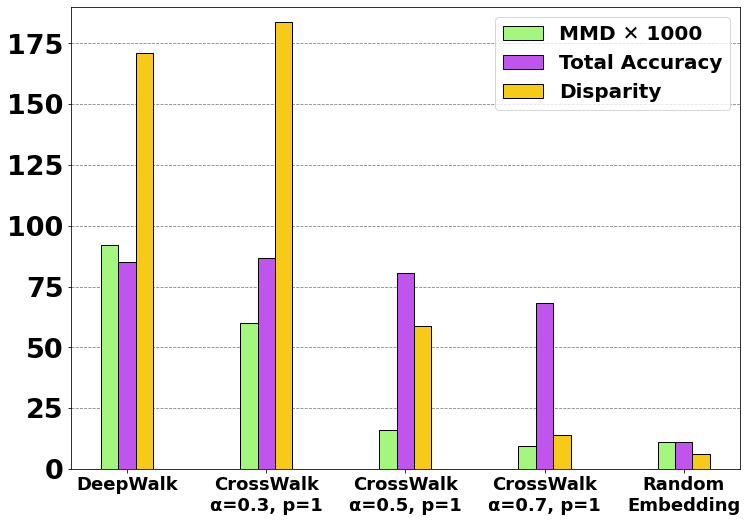

In [7]:
# Plotting the square plots
# Real Plots

label_size = 27
font_size = 27
image_size = (12, 8.5)
line_width = 3
square = True
bar_width = 0.5

y_lim = [0, 175]
get_bar_plot(real=True, bar_width=bar_width, fontsize=font_size, labelsize=label_size, imagesize=image_size, ylim=y_lim, legend_size=25)
y_lim = [0, 190]
get_mmd_plot(real=True, bar_width=bar_width, fontsize=font_size, labelsize=label_size, imagesize=image_size, ylim=y_lim, legend_size=20)